In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , classification_report


In [251]:
RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [139]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [140]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [141]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [142]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [143]:
data_df.target.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='target'>

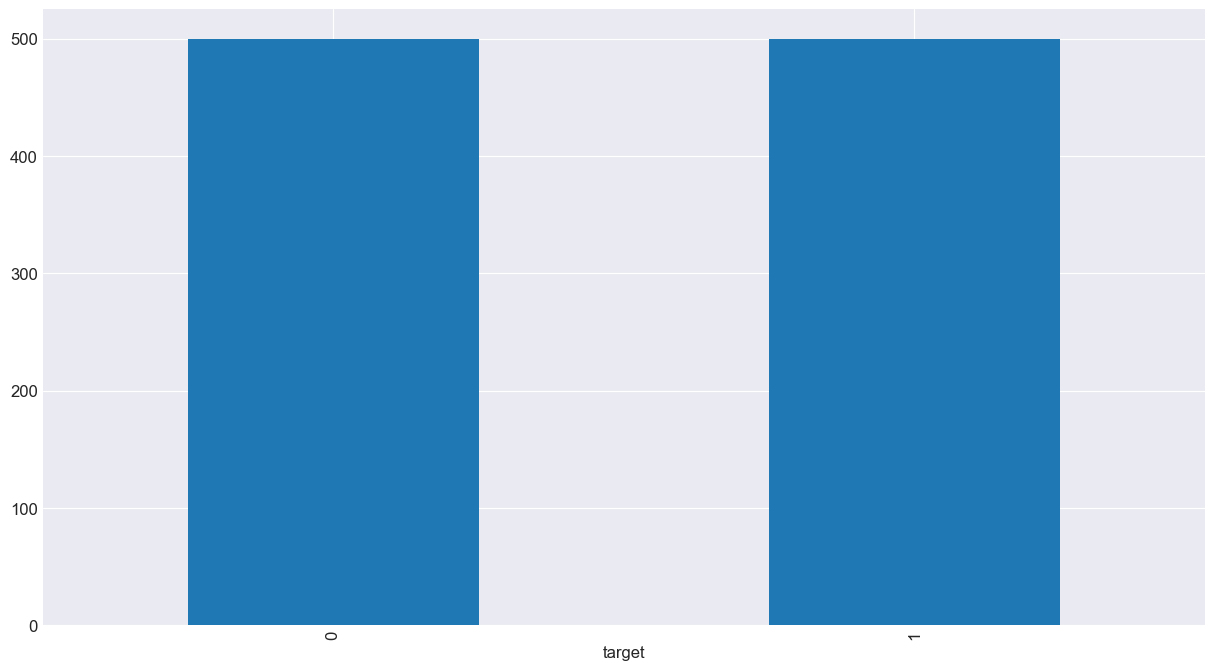

In [144]:

fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar')


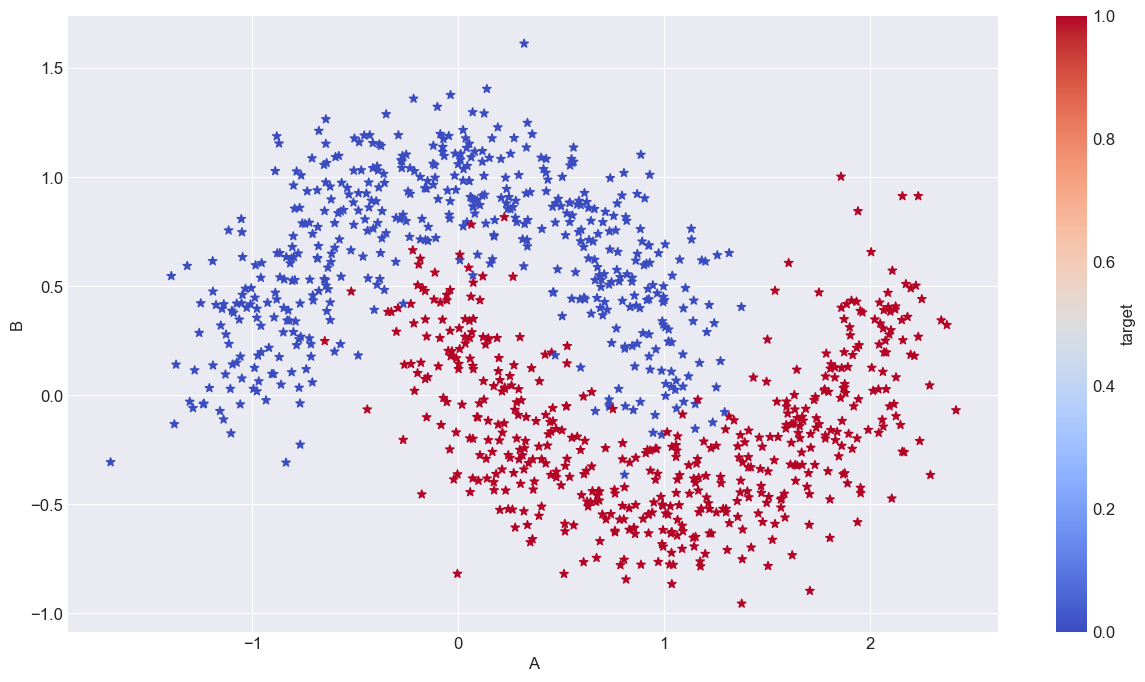

In [145]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP); 

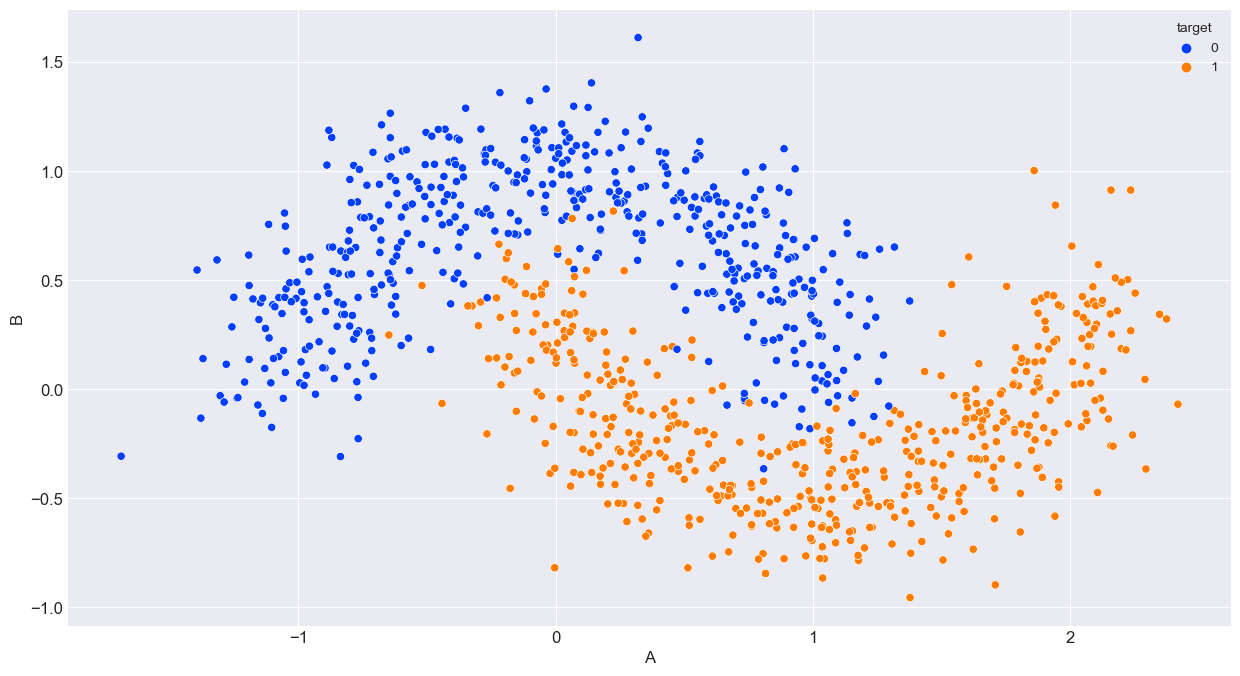

In [146]:
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

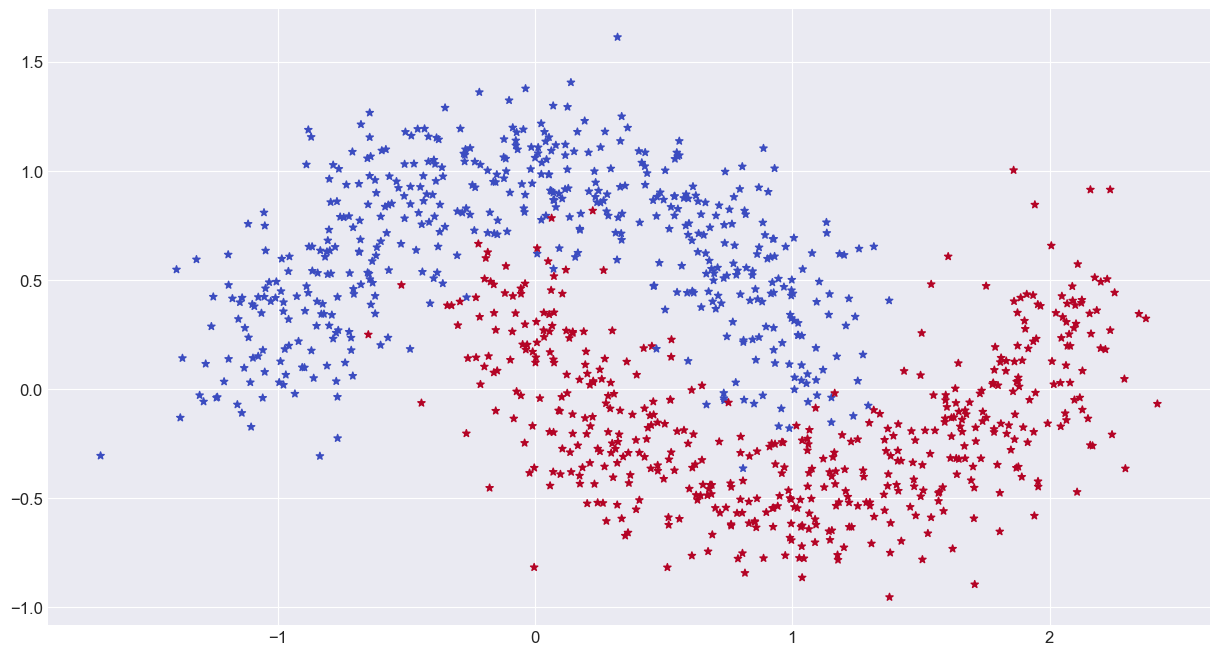

In [147]:
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [148]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

In [149]:
data_train , data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]

In [150]:
data_train.shape , data_test.shape

((900, 3), (100, 3))

In [151]:

def predict (row, weights):
    z = weights[0]
    for i in range(len(row)-1):
        z += weights[i + 1] * row[i]
    return 1 if z >= 0 else 0



In [152]:
wghts = np.array([0.1,2.0,1.0])

predict(data_train[0],wghts)

1

In [153]:
#stochastic gradient descent
def train_weights(train,n_epochs,alpha):

    errors = []
    weights = rng.random(train.shape[1])
    m = train.shape[0]

    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train:
            prediction = predict(row,weights)
            dz = prediction - row[-1] 
            sum_error += (prediction - row[-1])**2
            weights[0] = weights[0] - alpha * dz / m

            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m

        errors.append(sum_error/m)

    return errors,weights

In [154]:
errors , weights= train_weights(data_train,EPOCHS,ALPHA)

In [155]:
weights

array([-6.44966640e-05,  2.40695264e-04, -3.57032974e-04])

In [156]:
errors

[0.46,
 0.45,
 0.4388888888888889,
 0.43,
 0.42333333333333334,
 0.42444444444444446,
 0.42,
 0.4211111111111111,
 0.43444444444444447,
 0.43555555555555553,
 0.4477777777777778,
 0.46111111111111114,
 0.47444444444444445,
 0.47333333333333333,
 0.47888888888888886,
 0.47,
 0.46444444444444444,
 0.44333333333333336,
 0.43333333333333335,
 0.4222222222222222,
 0.41444444444444445,
 0.4077777777777778,
 0.39666666666666667,
 0.38555555555555554,
 0.37444444444444447,
 0.3611111111111111,
 0.34555555555555556,
 0.3388888888888889,
 0.3277777777777778,
 0.3211111111111111,
 0.3111111111111111,
 0.3011111111111111,
 0.2922222222222222,
 0.2788888888888889,
 0.27555555555555555,
 0.2633333333333333,
 0.25,
 0.23555555555555555,
 0.22,
 0.20444444444444446,
 0.19,
 0.17333333333333334,
 0.15444444444444444,
 0.14555555555555555,
 0.13666666666666666,
 0.13111111111111112,
 0.14333333333333334,
 0.14333333333333334,
 0.14333333333333334,
 0.14777777777777779,
 0.14555555555555555,
 0.143333333

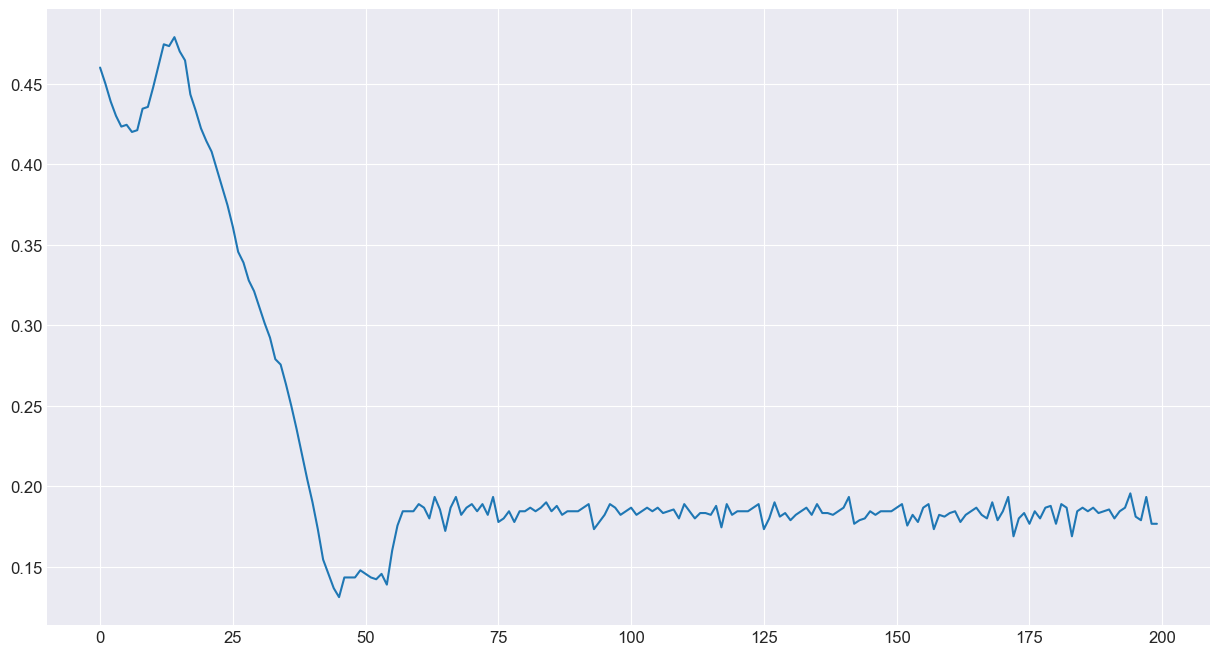

In [157]:
fig,ax = plt.subplots()
dm =0.05

ax.plot(errors)

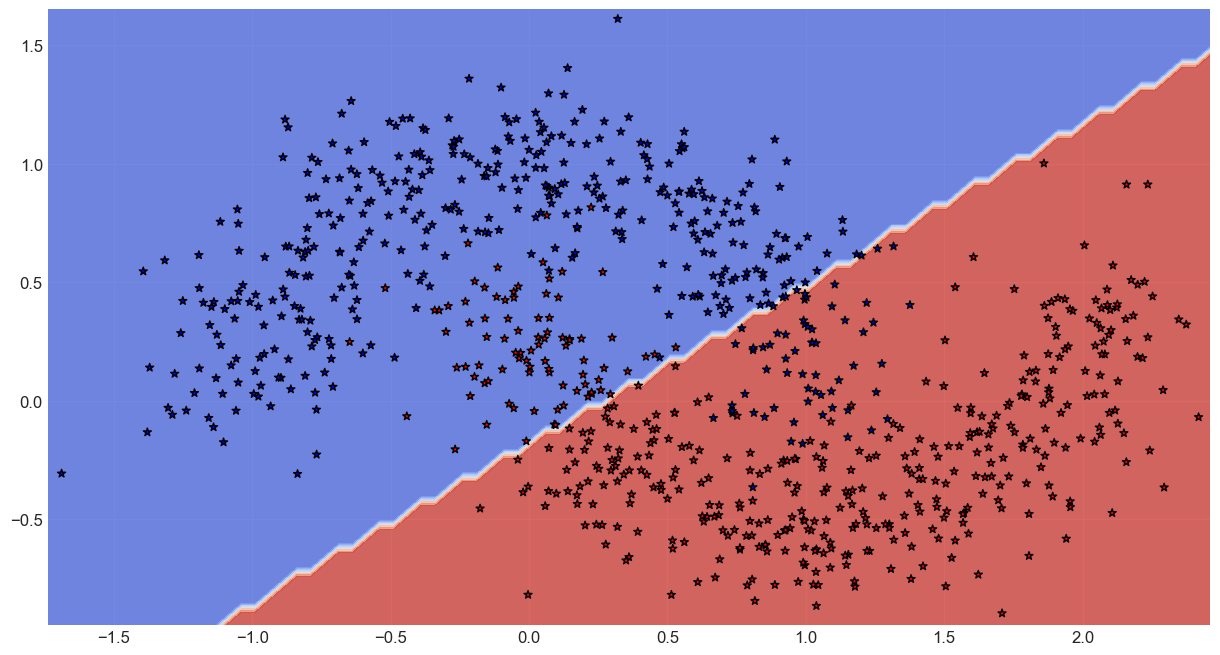

In [158]:
X = data_train
fig,ax = plt.subplots()
dm =0.05
x_min , x_max = X[:,0].min() - 0.05 , X[:, 0].max() + 0.05
y_min , y_max = X[:,1].min() - 0.05 , X[:, 1].max() + 0.05

xx , yy  = np.meshgrid(np.arange(x_min,x_max,dm),
                       np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0] , 1))))

y_pred = []

for row in XX:
    pred = predict(row , weights)
    y_pred.append(pred)
z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,z ,cmap = CMAP , alpha =0.8)
ax.scatter(X[:,0], X[:,1],c=X[:,2],
           edgecolors='k',
           marker='*',
           cmap=plt.cm.bwr)

In [159]:
predictions =[]
for row in data_train:
 pred = predict(row , weights)
 predictions.append(pred)
accuracy_score(data_train[:,-1],predictions)

0.8311111111111111

In [160]:
predictions =[]
for row in data_test:
 pred = predict(row , weights)
 predictions.append(pred)
accuracy_score(data_test[:,-1],predictions)

0.89

In [161]:
cm = confusion_matrix(data_test[:,-1],predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

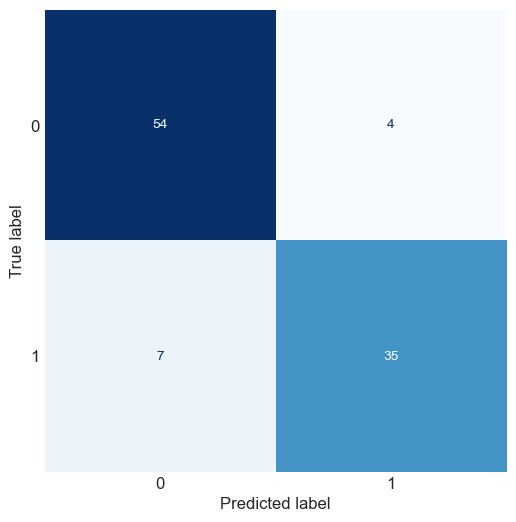

In [162]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels= [0,1])
fig,ax = plt.subplots(figsize =(6,6))
disp.plot(ax=ax , cmap = "Blues" ,colorbar=False)
ax.grid(False)

In [253]:
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           shuffle=True,
                           noise=NOISE,
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [254]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [255]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [256]:
def sigmoid(z):
  z = 1/(1+ np.exp2(-z))
  return z

In [257]:
def predict(row, weights):
  z = weights[0]
  for i in range(len(row) - 1):
    z += weights[i+1] * row[i]
  return sigmoid(z)

In [258]:
def fn_sigmoid(z):
   
    return 1/(1+np.exp-(z))

In [259]:
def fn_activ(z): # g(z)
    return np.tanh(z)

def fn_activ_prime(a): # g'(z)
    return 1. - np.tanh(a)**2

In [260]:
wgts = np.array([.1,2.0,1,0])
predict(data_train[0], wgts)

0.8756052696768576

In [261]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=RANDOM_STATE)

In [263]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [264]:
sm = sigmoid(np.asarray([[-1,0,1], [-np.inf, 0,np.inf]]))
sm

array([[0.33333333, 0.5       , 0.66666667],
       [0.        , 0.5       , 1.        ]])

In [265]:
def predict(model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    ##forward propagation

    #Layer1
    z1 = X_p.dot(W1) + b1
    a1 = fn_activ(z1)  #g

    #Layer2
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    return a2 >= 0.5  #Is it greater or equal to 0.5

In [266]:
def calculate_loss(model, X_l, y_l):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]

    #Layer1
    z1 = X_l.dot(W1) + b1
    a1 = fn_activ(z1)  #g

    #Layer2
    z2 = a1.dot(W2) + b2  # aggregation
    a2 = sigmoid(z2)      # activation

    data_loss = -(y_l*np.log(a2)).sum() # Binary

    return data_loss / m

In [267]:
loss_hist = {}

In [268]:
def build_model(X_tr, y_tr, nn_hdim, nn_out,alpha=ALPHA, epochs=EPOCHS):
  #X_tr = training features
  #y_tr = training labels
  #nn_hdim = number of nodes in the hidden layer
  #nn_out = size of output

  m, nn_input_dim = X_tr.shape
  nn_output_dim = nn_out

  W1 = rng.random((nn_input_dim, nn_hdim), dtype=np.float32) / np.sqrt(nn_input_dim)

  W2 = rng.random((nn_hdim, nn_output_dim), dtype=np.float32) / np.sqrt(nn_hdim)

  b1 = np.zeros((1, nn_hdim), dtype = np.float32)
  b2 = np.zeros((1, nn_output_dim), dtype = np.float32)

  curr_loss = 0
  loss, epoch = [], []

  for i in range(0, epochs):

    ##forward propagation

    #Layer1
    z1 = X_tr.dot(W1) + b1
    a1 = fn_activ(z1)  #g

    #Layer2
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    ##Back propagation

    assert(a2.shape == y_tr.shape), f'check {a2.shape} / {y_tr.shape}'
    dz2 = a2 - y_tr ## Remember dim of a2 and y to be same

    dW2 = (a1.T).dot(dz2)
    assert (W2.shape == dW2.shape), f'check W2 {W2.shape} / {dW2.shape}'

    db2 = np.sum(dz2, axis=0, keepdims=True)
    assert (b2.shape == db2.shape), f'check b2 {b2.shape} / {db2.shape}'

    da1 = dz2.dot(W2.T)
    assert (a1.shape == da1.shape), f'check a1 {a1.shape} / {da1.shape}'

    #Layer 1
    dz1 = da1 * fn_activ_prime(z1)  # 1st order differentation of 'g'
    assert (z1.shape == dz1.shape), f'check b2 {z1.shape} / {dz1.shape}'

    dW1 = (X_tr.T).dot(dz1)
    assert (W1.shape == dW1.shape), f'check W2 {W1.shape} / {dW1.shape}'

    db1 = np.sum(dz1, axis=0, keepdims=True)
    assert (b1.shape == db1.shape), f'check b2 {b1.shape} / {db1.shape}'

    ## Gradient update

    W1 += -alpha * dW1 / m
    b1 += -alpha * db1 / m
    W2 += -alpha * dW2 / m
    b2 += -alpha * db2 / m

    model = {'W1' : W1, 'b1' : b1,'W2' : W2,'b2' : b2}

    curr_loss = calculate_loss(model, X_tr, y_tr)
    loss.append(curr_loss)
    epoch.append(i)

    if i%100 == 0:
      print(f'After epoch: {i: 3d}; loss: {curr_loss: .5f}')

  loss_hist['epoch']= epoch
  loss_hist['loss']= loss


  return model

In [269]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(800,)
(800, 1)


In [270]:
nn_out_dim = 1
model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:   0; loss:  0.31074
After epoch:  100; loss:  0.23310
After epoch:  200; loss:  0.18068
After epoch:  300; loss:  0.16008
After epoch:  400; loss:  0.15333
After epoch:  500; loss:  0.15129
After epoch:  600; loss:  0.15050
After epoch:  700; loss:  0.15009
After epoch:  800; loss:  0.14981
After epoch:  900; loss:  0.14957
After epoch:  1000; loss:  0.14936
After epoch:  1100; loss:  0.14915
After epoch:  1200; loss:  0.14894
After epoch:  1300; loss:  0.14871
After epoch:  1400; loss:  0.14845
After epoch:  1500; loss:  0.14812
After epoch:  1600; loss:  0.14768
After epoch:  1700; loss:  0.14705
After epoch:  1800; loss:  0.14610
After epoch:  1900; loss:  0.14462
After epoch:  2000; loss:  0.14240
After epoch:  2100; loss:  0.13922
After epoch:  2200; loss:  0.13506
After epoch:  2300; loss:  0.13010
After epoch:  2400; loss:  0.12464
After epoch:  2500; loss:  0.11900
After epoch:  2600; loss:  0.11338
After epoch:  2700; loss:  0.10785
After epoch:  2800; loss:  0.10

<Axes: xlabel='epoch'>

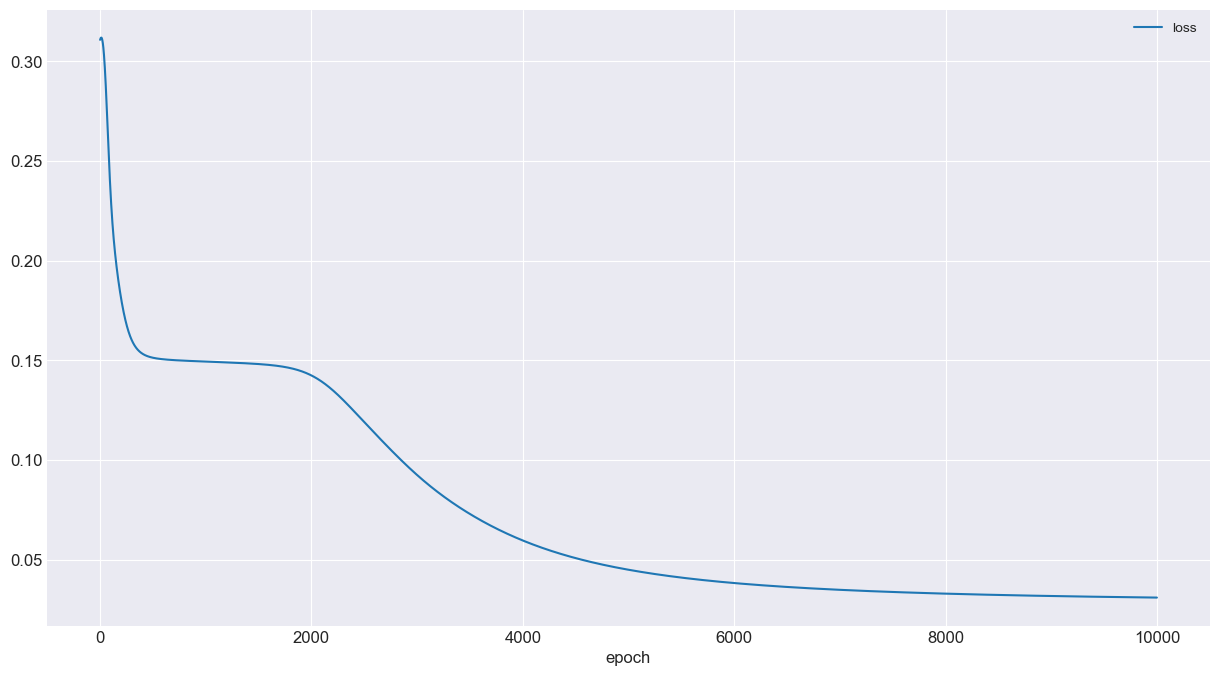

In [271]:
pd.DataFrame(loss_hist).plot(x='epoch')

In [272]:
nn_out_dim = 1
model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:   0; loss:  0.31573
After epoch:  100; loss:  0.22675
After epoch:  200; loss:  0.17650
After epoch:  300; loss:  0.15826
After epoch:  400; loss:  0.15264
After epoch:  500; loss:  0.15073
After epoch:  600; loss:  0.14972
After epoch:  700; loss:  0.14882
After epoch:  800; loss:  0.14774
After epoch:  900; loss:  0.14626
After epoch:  1000; loss:  0.14417
After epoch:  1100; loss:  0.14130
After epoch:  1200; loss:  0.13764
After epoch:  1300; loss:  0.13334
After epoch:  1400; loss:  0.12866
After epoch:  1500; loss:  0.12390
After epoch:  1600; loss:  0.11927
After epoch:  1700; loss:  0.11490
After epoch:  1800; loss:  0.11080
After epoch:  1900; loss:  0.10698
After epoch:  2000; loss:  0.10337
After epoch:  2100; loss:  0.09991
After epoch:  2200; loss:  0.09651
After epoch:  2300; loss:  0.09310
After epoch:  2400; loss:  0.08963
After epoch:  2500; loss:  0.08614
After epoch:  2600; loss:  0.08272
After epoch:  2700; loss:  0.07942
After epoch:  2800; loss:  0.07

In [273]:
y_pred = predict(model, X_train)
accuracy_score(y_train, y_pred)

0.9825

In [274]:
wgts = np.array([0.1, 2.0, 1, 0])

In [275]:
weights

array([-6.44966640e-05,  2.40695264e-04, -3.57032974e-04])

Text(0.5, 1.0, 'Loss curve')

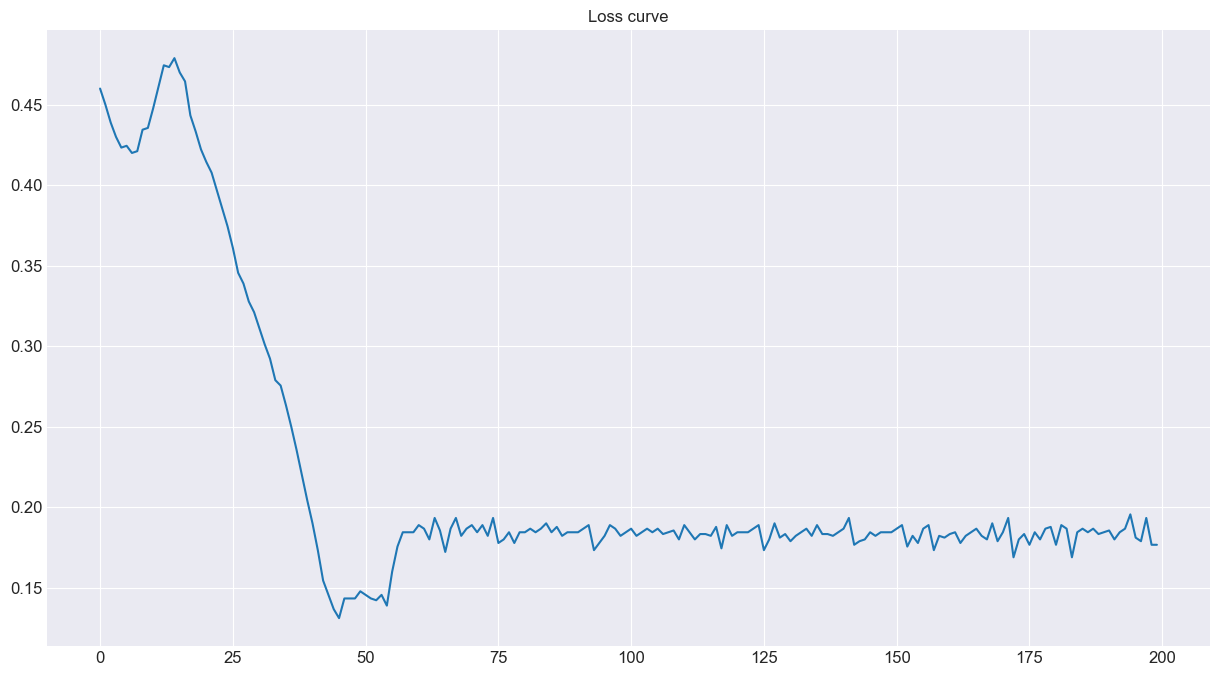

In [276]:
ax = plt.plot(errors) #loss curve
plt.title('Loss curve')

In [277]:
rng.random(data_train.shape[1]) #w0, w1, w2
#Z = x*w + b
#Z = weights[0]

array([0.37827264, 0.17604533, 0.64260085])